# <center>Recherche Opérationnelle<br /> Workshop</center>

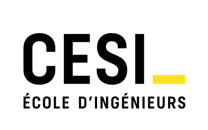

Ce Workshop aborde l'une des méthodes de résolution les plus utilisées dans la Recherche Opérationnelle, la Programmation Linéaire. Nous allons nous concentrer sur la modélisation par programmation linéaire, ses différentes variantes, et différentes méthodes de résolutions avec leurs limites.

Vous aurez un certain nombre d'équations à écrire. Rappel&nbsp;: vous pouvez insérer dans une cellule Markdown des [équations au format $\mathrm{\LaTeX}$](https://www.math.ubc.ca/~pwalls/math-python/jupyter/latex/) en les plaçant entre \\$. Par exemple, le code<br />
```latex
$$\sum_{i=1}^n n$$
 ```
 
produira l'expression mathématique<br />
$$\sum_{i=1}^n n$$


# 1. Programme linéaire en nombre réels à 2 dimensions
Une multinationale de bonbons pour les enfants dispose de 2 arômes de base pour la fabrication de ses produits. La saveur de chaque bonbon dépend de la quantité de chaque arôme.<br />
Le premier ingrédient coûte à l'entreprise 10€/kg et le deuxième 20€/kg. Le coût de fabrication d'un kilo de produit (somme du mélange de 2 ingrédients) est de 5€. Les études de gôut auprès des consommateurs a montré que la composition du mélange ne doit pas être supérieure à 50% du premier ingrédient et 80% du deuxième.<br />
Par ailleurs, le mois dernier, l'entreprise a vendu 100 Kg à 50€/kg. L'entreprise ne souhaite pas produire plus que ce qu'elle arrive à vendre. Combien de kilos de bonbons doit-elle fabriquer par mois et les proportions de chaque ingrédient pour maximiser les bénéfices&nbsp;?

## 1.1 Modélisation du problème

Commençons par modéliser le problème sous la forme d'un programme linéaire.<br />

### Variables de décision du programme
Identifiez les inconnues qui sont à déterminer dans le problème. On les nommera avec des variables $X_1$, $X_2$,…

<blockquote>
$X_1$&nbsp;: quantité d'arôme 1<br />
$X_2$&nbsp;: quantité d'arôme 2<br />
</blockquote>

### Contraintes du programme
Quelles contraintes identifiez-vous dans le texte&nbsp;?

<blockquote>

Les contraintes sont des conditions sur l'usage des ressources, c'est à dire des conditions que doivent respecter les valeurs des variables de décision pour former une solution <em>admissible</em>.
Il y en a trois explicites&nbsp;:

<ul>
    <li>La quantité de demande maximale par mois</li>
    <li>La règle de composition _inférieur à 50% de l'arôme 1</li>
    <li>La règle de composition _inférieur à 80% de l'arôme 2</li>
</ul>

Il y a aussi une règle implicite, mais qu'il est important d'exprimer&nbsp;:
<ul>
    <li>Contraintes de non-négativité (nombre de kgs/mois positifs)</li>
</ul>
</blockquote>

Modélisez toutes ces contraintes sous formes d'inéquations sur une ou plusieurs variables de notre problème.
<blockquote>

Dans le cas d'un programme linéaire, ces contraintes sont elle-mêmes linéaires, Il est important de fixer les unités (temps, monétaire, …) et de les respecter dans tout le programme linéaire.

<ul><li>
    Quantité de demande maximale par mois&nbsp;:<br />
  $X_1 + X_2 \leq 100$<br /><br />
    </li><li>
    Règle de composition <em>inférieur à 50% de l'arôme 1</em>&nbsp;:<br />
  $\frac{X_1}{X_1 + X_2} \leq 0.5$, reformulé $0,5X_1 – 0,5X_2 \leq 0$<br /><br />
    </li><li>
    Règle de composition <em>inférieur à 80% de l'arôme 2</em>&nbsp;:<br />
  $\frac{X_2}{X1 + X2} \leq 0.8$, reformulé $-0,8X_1 + 0,2X_2 \leq 0$<br /><br />
    </li><li>
    Contraintes de non-négativité&nbsp;:<br />
      $X_1, X_2 \geq 0$
</li></ul>
</blockquote>

###  Fonction économique
Exprimez la fonction économique du problème.

<blockquote>

La fonction économique décrit ce qu'on veut optimiser lors de l'usage de nos ressources. C'est donc une fonction de nos variables de décision, que l'on doit maximiser ou minimiser. Comme pour les contraintes, dans un programme linéaire, cette fonction économique doit être elle-même linéaire. 

Ici, la fonction économique doit maximiser le bénéfice (prix de vente des bonbons - coût des matières premières et de fabrication), soit&nbsp;:<br />
$F (X_1, X_2) = 50\times (X_1+X_2)–10\times X_1–20\times X_2-5\times (X_1+X_2)$<br />
reformulée<br />
$F (X_1, X_2) = 35X_1 + 25X_2$
</blockquote>

###  1.1.4 Programme linéaire complet
Réunissez les réponses du dessus pour exprimer le programme linéaire complet optimisant la composition des bonbons de l'usine. Vous pouvez compléter la formule $\mathrm{\LaTeX}$ ci-dessous ($\text{s.c.}$ veut dire _sous contraintes_)&nbsp;:

$\begin{array}{rl@{}ll}
\text{Minimiser/Maximiser}  & … &\\
\text{s.c.}& … & \leq…\\
          & … & \geq …\\
          & …
\end{array}$

<blockquote>

$\begin{array}{rl@{}ll}
\text{Maximiser}  & 35X_1 + 25X_2 &\\
\text{s.c.}& X_1 + X_2 & \leq 100\\
           & 0.5X_1 - 0,5X_2 & \leq 0\\
           & -0,8X_1 + 0,2X_2 & \leq 0\\
           & X_1 & \geq 0\\
           & X_2 & \geq 0
\end{array}$
</blockquote>

## 1.2 Résolution par la méthode graphique

Pour comprendre le comportement de ce genre de système, on va regarder comment il se comporte graphiquement. Chaque variable sera représentée sur un axe du graphique. Ici, le problème a deux variables, il sera représenté sur un plan. Nous allons prendre la convention suivante&nbsp;: $X_1$ sera représenté sur l'axe des abscisses et $X_2$ sera représenté sur l'axe des ordonnées.

<blockquote class="comment">
<strong style="text-decoration:underline;display:block">Explications</strong>
Évidemment, cette méthode graphique ne peut être appliquée que sur un programme linéaire comportant au plus trois variables (et encore, cela reste nettement plus lisible avec deux variables). Au-delà, la représentation et la résolution graphiques deviennent impossibles (imaginez la représentation graphique d'un problème à 4 ou 5 dimensions).

Dans le cas qui nous occupe, on pourrait trouver la solution au problème en résolvant ce système d'inéquations, voire en cherchant de manière empirique, mais ce n'est pas le but. On essaye de comprendre ce qu'implique le fait d'avoir des contraintes et une fonction économique linéaires.
</blockquote>

Nous allons représenter sur ce plain les inéquations de contraintes et la fonction économique. Pour cela, nous utiliserons [matplotlib](https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html).

### Représentation des contraintes
Commençons par placer les différentes contraintes

Déjà, comment tracer une droite en Python&nbsp;? C'est très simple avec [la fonction `plot`](https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html) de la bibliothèque [Matplotlib](https://matplotlib.org/3.1.0/tutorials/), surtout si on utilise [NumPy](https://www.courspython.com/apprendre-numpy.html) pour manipuler des [intervalles de valeurs linéaires](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html). Il suffit d'utiliser la fonction [`fill_between`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.fill_between.html).

<blockquote class="comment">
<strong style="text-decoration:underline;display:block">Explications</strong>

Le but ici est de tracer une inéquation, il faudrait donc faire ressortir la zone des valeurs respectant l'inégalité. Pour les inéquations du type $y\geq\dots$, il suffit pour cela d'utiliser <code>fill_between</code>(https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.fill_between.html) (en laissant pour le paramètre <code>y2</code> la valeur pas défaut 0). La partie respectant l'inégalité reste en blanc.
</blockquote>

Avant de l'utiliser pour afficher notre programme linéaire, testons ça sur un petit exemple. Mettons qu'on veuille représenter l'inéquation $2x + y \leq 4$

<blockquote class="comment">
<strong style="text-decoration:underline;display:block">Explications</strong>

Jupyter est parfois un peu capricieux avec Matplotlib, c'est <code>&lt;Figure size 640x480 with 1 Axes&gt;</code>, il faut réexécuter la cellule.
</blockquote>


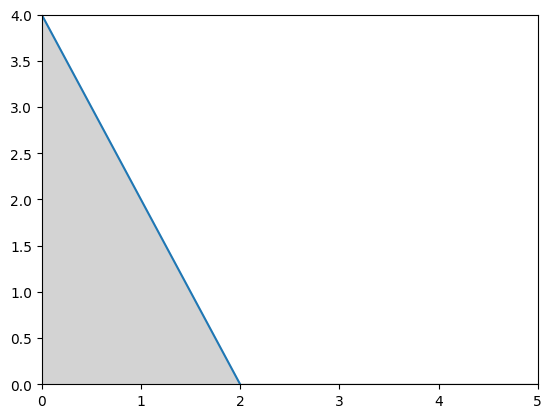

In [2]:
import numpy as np
import matplotlib.pyplot as plt

xmax = 5
x = np.linspace(0, xmax) # on genere l'intervalle des x
y = 4 - 2*x # on genere l'intervalle des y

ymax = np.amax(y)

plt.plot(x, y)
plt.fill_between(x, y, color='lightgrey')

# on dessine entre 0,0 et les extremas des fonctions
plt.xlim(0, xmax)
plt.ylim(0, ymax)

# on affiche
plt.show()

Si on doit tracer une inégalité du type $y\leq\dots$, il suffit de spécifier une valeur pour le paramètre `y2` de la fonction `fill_between`. La valeur de `ymax` permettra de couvrir tout le graphique.

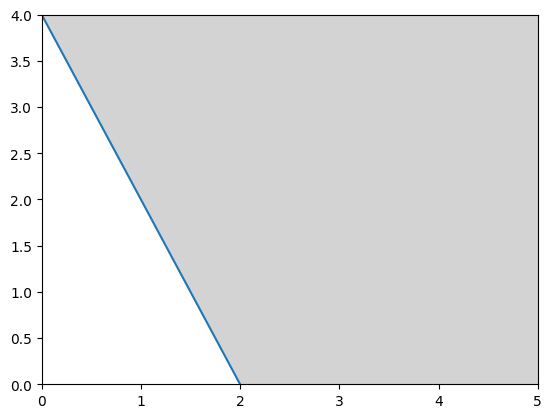

In [3]:
ymax = np.amax(y)

plt.plot(x, y)
plt.fill_between(x, y, ymax, color='lightgrey')

# on dessine entre 0,0 et les extremas de la fonction
plt.xlim(0, xmax)
plt.ylim(0, ymax)

# on affiche
plt.show()

On a donc tout ce qu'il nous faut pour afficher les inéquations de nos contraintes. Traçons les droites en rouge, et les zones d'inégalités en gris.

<blockquote class="comment">
<strong style="text-decoration:underline;display:block">Explications</strong>

les contraintes de non négativité pourront être simplement gérées en définissant les limites d'axes, et on ira jusqu'à 100, quitte à ajuster si nécessaire). Rappelons que $X_1$ est sur l'axe des abscisses et $X_2$ sur l'axe des ordonnées.
</blockquote>

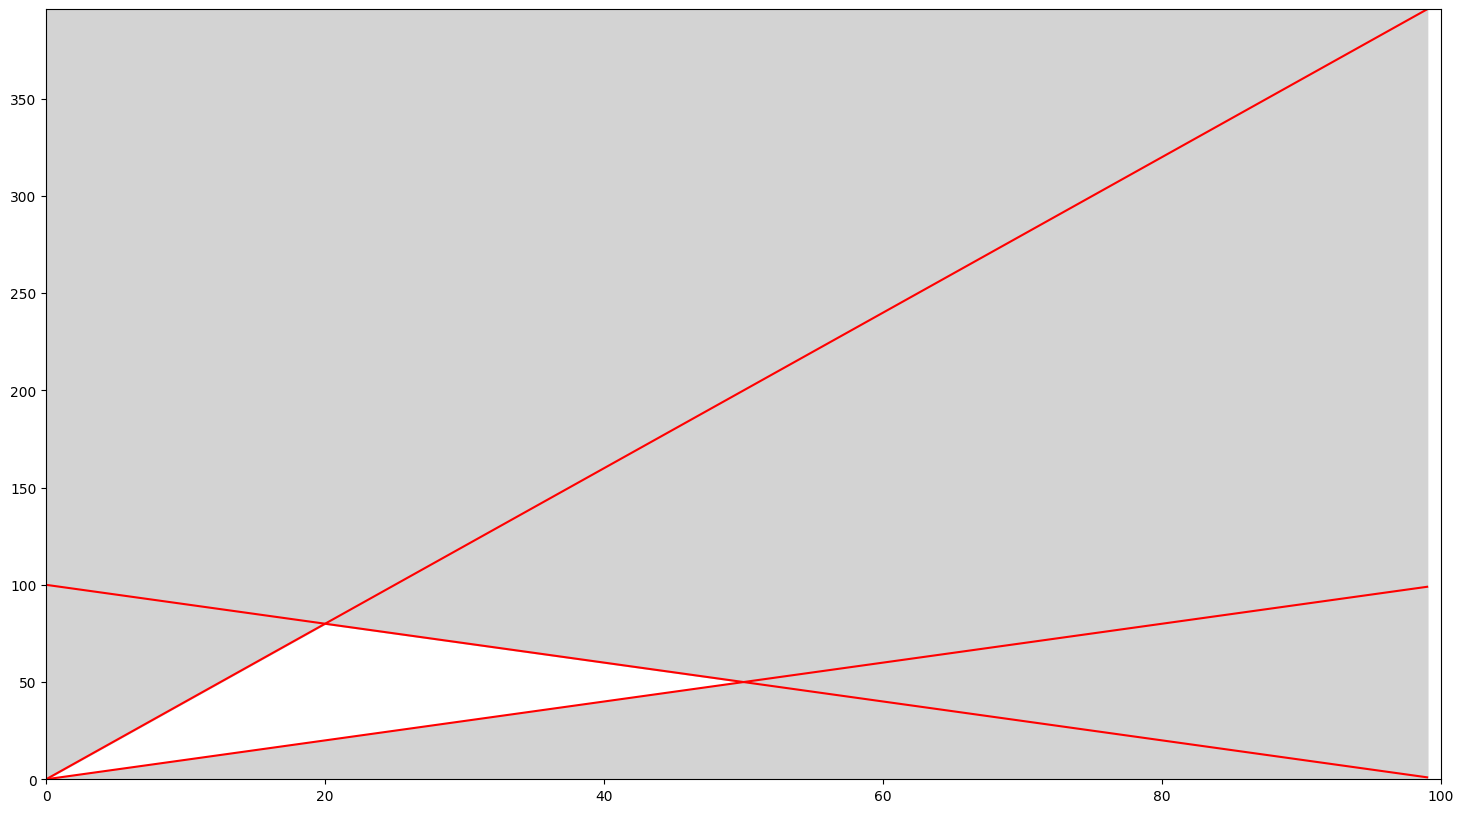

In [4]:
xmax = 100
x = np.arange(0, xmax) # on genere l'intervalle des x. Pour cela, on utilise la version NumPy de range(),
                       # pour pouvoir effectuer facilement les calculs de Y

y1 = 100-x # opération possible avec la version NumPy de range()
y2 = x
y3 = 4*x

ymax = max(max(y1), max(y2), max(y3))

plt.plot(x, y1, color='red')
plt.plot(x, y2, color='red')
plt.plot(x, y3, color='red')

plt.fill_between(x, y1, ymax, color='lightgrey')
plt.fill_between(x, y2, color='lightgrey')
plt.fill_between(x, y3, ymax, color='lightgrey')

# on dessine entre 0,0 et les extrema
plt.ylim(0, ymax)
plt.xlim(0, xmax)

# on affiche
plt.gcf().set_size_inches(18, 10) # cette fois on affiche en grand
plt.show()

Que représente la partie apparaissant en blanc&nbsp;? Quelle est sa caractéristique mathématique&nbsp;?

<blockquote>
    
C'est l'espace des solutions admissibles. Toutes les valeurs de $(X_1, X_2)$ respectant les contraintes sont dans cet espace. C'est une surface convexe.
</blockquote>  

### Représentation de la fonction économique

Nous allons pouvoir utiliser cette propriété pour définir la solution optimale. Il nous faut donc maintenant représenter la fonction économique. Sa forme générale est $ax +by = p$. Cette fonction est la famille des droites correspondant à l’ensemble–solution avec une pente $\dfrac{-a}{b}$. Dans notre cas, que vaut cette pente&nbsp;?

<blockquote>

La fonction économique est de la forme $F (X_1, X_2) = 35X_1 + 25X_2$. La pente vaut donc  $\dfrac{-35}{25}=\dfrac{-7}{5}$.
</blockquote>


Le but est de trouver la fonction linéaire de $p$ qui maximise la fonction économique tout en restant dans l'espace des solutions admissibles. Quelle est la forme générale de cette fonction&nbsp;? Quelle valeur devons-nous donc déterminer&nbsp;?

<blockquote>

$y=x\times p+n$ avec $p=\dfrac{-7}{5}$, soit $y=x\times \dfrac{-7}{5}+n$<br />
Le but est donc de déterminer le $n$ maximisant la valeur de la fonction économique dans le polygone. 
</blockquote>

Un [Widget](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html) intégré [automatiquement](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html) à notre fonction de calcul nous permettra de faire varier facilement ce paramètre et de déterminer les valeurs admissibles de $X_1$ et $X_2$ maximisant la fonction économique. Le code vous est fourni, il ne vous reste plus qu'à implémenter le calcul et l'affichage de la fonction économique tenant compte de cette valeur réelle&nbsp;!

<blockquote class="comment">
<strong style="text-decoration:underline;display:block">Explications</strong>

Ce code consiste simplement à déplacer les instructions affichant le polygone ainsi que la droite de la fonction économique dans une fonction, et à ajouter un slider permettant à l'utilisateur de choisir une valeur réelle, qui est passée à la fonction en question à chaque modification du slider.
</blockquote>

Une fois que vous avez localisé globalement la position de la solution, vous pouvez modifier l'intervalle `x` pour zoomer sur cette partie et obtenir un résultat plus précis.

In [8]:
from ipywidgets import interact
import ipywidgets as widgets

# cette fonction est appelée à chaque changement d'état du slider.
def trace(n):
    # on reprend le code precedent
    xmax = 60
    x = np.arange(0, xmax) # on genere l'intervalle des x

    y1 = 100-x                                        
    y2 = x                                            
    y3 = 4*x                                          
                                                      
    ymax = max(np.amax(y1), np.amax(y2), np.amax(y3)) 
                                                      
    plt.plot(x, y1, color='red')                      
    plt.plot(x, y2, color='red')                      
    plt.plot(x, y3, color='red')                      
    plt.fill_between(x, y1, ymax, color='lightgrey')  
    plt.fill_between(x, y2, color='lightgrey')        
    plt.fill_between(x, y3, ymax, color='lightgrey') 

    # on dessine entre 0 et les extrema
    plt.ylim(0, ymax)
    plt.xlim(0, xmax)
    pente = -7/5
    yeco = (x*pente)-n
    plt.plot(x, yeco)
    
    plt.gcf().set_size_inches(18, 10) # cette fois on affiche en grand
    plt.show()
    
# le slider qui permet de faire varier la valeur passee en parametre de la fonction trace
interact(trace, n=widgets.FloatSlider(min=-200.0, max=0.0, step=1, value=-150.0));

interactive(children=(FloatSlider(value=-150.0, description='n', max=0.0, min=-200.0, step=1.0), Output()), _d…

### Résolution
Utilisez le slider pour déplacer la droite sur le polygone. Que peut-on en déduire sur les valeurs de $X_1$ et $X_2$&nbsp;? Que vaut la fonction économique&nbsp;?

<blockquote>



$X_1=50$<br />
$X_2=50$<br />
valeur optimale&nbsp;: 3000€
</blockquote>

Imaginez qu'on ajoute un nombre quelconque de contraintes, donc de droites. Quelle propriété vérifie la solution optimale d'un problème linéaire en nombres réels sur cette partie&nbsp;? Et que pouvez-vous en déduire sur la solution optimale d'un tel problème&nbsp;?

<blockquote>

Quel que soit le nombre de droites qu'on ajoute, l'espace des solutions admissible reste un polygone convexe. On voit bien que si on déplace la droite de la fonction économique jusqu'à la limite de cet espace, on trouvera forcément une solution optimale sur l'un des sommets du polygone.

Ce résultat s'étend à un nombre quelconque de dimensions, du fait de la structure linéaire du programme. On parle alors  d'un polytope convexe (puisque borné par des hyperplans).
    
<strong>Théorème</strong>&nbsp;: Soit $f$ une fonction économique linéaire définie sur un polytope convexe borné. Alors la fonction $f$ atteint sa valeur maximale en au moins un des sommets du polytope convexe.
    
Ce résultat est très important, c'est lui qui permet de résoudre les problèmes linéaires de manière efficace.
</blockquote>


# 2. Programme linéaire en nombre réels à $n$ dimensions

Arcelor-Mittal, géant mondial de l'acier, a ouvert une nouvelle usine en Grèce. Il fabrique 9 alliages à base de 3 matières premières&nbsp;: le plomb, le zinc et l'étain.
Voici un tableau avec les pourcentages de chaque matière dans l'alliage et son coût par unité&nbsp;:

| Alliage       | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   | 9   |
|---------------|-----|-----|-----|-----|-----|-----|-----|-----|-----|
|**% plomb**    | 20  | 50  | 30  | 30  | 30  | 60  | 40  | 10  | 10  |
|**% zinc**     | 30  | 40  | 20  | 40  | 30  | 30  | 50  | 30  | 10  |
|**% étain**    | 50  | 10  | 50  | 30  | 40  | 10  | 10  | 60  | 80  |
|**Coût unit.** | 7.3 | 6.9 | 7.3 | 7.5 | 7.6 | 6.0 | 5.8 | 4.3 | 4.1 |

Le département de R&D recherche un « nouvel alliage » à prix minimum qui serait un mélange des 9 autres avec les contraintes d'avoir au maximum 30% de plomb, 30% de zinc et 40% d'étain.

## 2.1 Modélisation du problème

Commençons par modéliser le problème sous la forme d'un programme linéaire. Appliquez la méthode de l'exercice précédent.<br />

<blockquote>

<strong>Variables de décision</strong><br />
$X_n$&nbsp;: Proportion de l'alliage N° $n$ présent dans le nouveau mélange

<strong>Contraintes du programme</strong>
* Contrainte 1&nbsp;: maximum de 30% de plomb<br />
  $0,2X_1 + 0,5X_2 + 0,3X_3 + 0,3X_4 + 0,3X_5 + 0,6X_6 + 0,4X_7 + 0,1X_8 + 0,1X_9 \leq 0,3$
<br /><br />

* Contrainte 2&nbsp;: maximum un 30% de zinc<br />
  $0,3X_1 + 0,4X_2 + 0,2X_3 + 0,4X_4 + 0,3X_5 + 0,3X_6 + 0,5X_7 + 0,3X_8 + 0,1X_9 \leq 0,3$
<br /><br />

* Contrainte 3&nbsp;: maximum un 40% d’étain<br />
  $0,5X_1 + 0,1X_2 + 0,5X_3 + 0,3X_4 + 0,4X_5 + 0,1X_6 + 0,1X_7 + 0,6X_8 + 0,8X_9 \leq 0,4$
<br /><br />

* Contrainte 4&nbsp;: la somme de proportions doit être égale à 1<br />
  $\displaystyle\sum_{i=1}^{n}{X_i} = 1$
<br /><br />

* Contraintes de non-négativité<br />
  $X_i \geq 0 ~\forall i\in[1, 9]$

<strong> Fonction économique</strong><br />
Minimiser $F(X_1,\dots, X_9 ) = 7,3X_1+ 6_,9X_2 + 7,3X_3 + 7.5X_4 + 7.6X_5 + 6X_6 + 5.8X_7 + 4.3X_8 + 4,1X_9$

<strong>Programme linéaire</strong>
$\begin{array}{rl@{}l}
\text{Minimiser}  & 7,3X_1+ 6_,9X_2 + 7,3X_3 + 7.5X_4 + 7.6X_5 + 6X_6 + 5.8X_7 + 4.3X_8 + 4,1X_9 &\\
\text{s.c.}& 0,2X_1 + 0,5X_2 + 0,3X_3 + 0,3X_4 + 0,3X_5 + 0,6X_6 + 0,4X_7 + 0,1X_8 + 0,1X_9 & \leq 0,3\\
           & 0,3X_1 + 0,4X_2 + 0,2X_3 + 0,4X_4 + 0,3X_5 + 0,3X_6 + 0,5X_7 + 0,3X_8 + 0,1X_9 & \leq 0,3\\
           & 0,5X_1 + 0,1X_2 + 0,5X_3 + 0,3X_4 + 0,4X_5 + 0,1X_6 + 0,1X_7 + 0,6X_8 + 0,8X_9 & \leq 0,4\\
           & \displaystyle\sum_{i=1}^{n}{X_i} = 1\\
           & X_i \geq 0 ~\forall i\in[1, 9]\\
\end{array}$

</blockquote>

## 2.2 Résolution
Nous sommes en présence d'un problème à 9 variables. La méthode de résolution graphique ne peut pas être appliquée ici, nous allons nous tourner vers le solveur [PuLP](https://pythonhosted.org/PuLP/) qui calculera lui-même la solution, en exploitant la propriété qu'on a identifiée dans l'exercice précédent.

<blockquote class="comment">
<strong style="text-decoration:underline;display:block">Explications</strong>
Il existe de nombreux solveurs sur le marché. Si le solveur d'Excel est rapidement mis à mal, des produits orientés vers le calcul haute performance sont disponibles, tant commerciaux (Cplex, AIMMS…) qu'open source (GLPK, LP_Solve…), dont les performances et les fonctionnalités varient grandement.

PuLP est en fait un framework Python qui permet de s'interfacer avec plusieurs solveurs (il s'interface par défaut avec <a href="https://projects.coin-or.org/CoinMP">CoinMP</a>, avec lequel il est livré par défaut). L'intérêt, en dehors de pouvoir utiliser des solveurs commerciaux très performants, c'est que son usage est très intuitif.
</blockquote>

On va s'inspirer d'[un exemple basique](https://www.coin-or.org/PuLP/CaseStudies/a_blending_problem.html) pour implémenter et résoudre le modèle&nbsp;:

<blockquote class="comment">
<strong style="text-decoration:underline;display:block">Explications</strong>

Dans cette solution (et celle de la question suivante), on écrit manuellement les équations. Ça reste encore faisable sur des programmes de cette taille, mais pour des programmes plus volumineux, il vaudra mieux utiliser des matrices de poids pour les contraintes et la fonction objectif, et les combiner avec un dictionnaire de variables grâce à <code>lpSum()</code>. Cette solution est présentée dans le Workshop <em>Performances et optimisation des métaheuristique</em>.

In [9]:
from pulp import *
import numpy as np

# variables du problème
X1 = LpVariable("X_1", 0, None)
X2 = LpVariable("X_2", 0, None)
X3 = LpVariable("X_3", 0, None)
X4 = LpVariable("X_4", 0, None)
X5 = LpVariable("X_5", 0, None)
X6 = LpVariable("X_6", 0, None)
X7 = LpVariable("X_7", 0, None)
X8 = LpVariable("X_8", 0, None)
X9 = LpVariable("X_9", 0, None)


# probleme
prob = LpProblem("alliage", LpMinimize)

# objectif
prob += 7.3*X1 + 6.9*X2 + 7.3*X3 + 7.5*X4 + 7.6*X5 + 6.0*X6 + 5.8*X7 + 4.3*X8 + 4.1*X9

# contraintes
prob += 0.2*X1 + 0.5*X2 + 0.3*X3 + 0.3*X4 + 0.3*X5 + 0.6*X6 + 0.4*X7 + 0.1*X8 + 0.1*X9 <= 0.3
prob += 0.3*X1 + 0.4*X2 + 0.2*X3 + 0.4*X4 + 0.3*X5 + 0.3*X6 + 0.5*X7 + 0.3*X8 + 0.1*X9 <= 0.3
prob += 0.5*X1 + 0.1*X2 + 0.5*X3 + 0.3*X4 + 0.4*X5 + 0.1*X6 + 0.1*X7 + 0.6*X8 + 0.8*X9 <= 0.4
prob += X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 == 1

prob.solve()
print(LpStatus[prob.status])
print("Min=", value(prob.objective))

# variables resultat
for v in prob.variables():
    print("%s=%.2f"%(v.name,v.varValue), end=', ')


Optimal
Min= 4.98
X_1=0.00, X_2=0.00, X_3=0.00, X_4=0.00, X_5=0.00, X_6=0.40, X_7=0.00, X_8=0.60, X_9=0.00, 

Nous avons notre solution optimale&nbsp;! On peut même pousser le raffinement jusqu'à utiliser $\mathrm{\LaTeX}$ pour améliorer le rendu&nbsp;:

In [11]:
from IPython.display import display, Latex

# variables resultat
result = ""
for v in prob.variables():
    valeur = round(v.varValue*100, 2)
    if valeur > 0:
        result += "$"+v.name+"="+str(valeur)+"\%$, "

display(Latex(result))

<>:8: SyntaxWarning: invalid escape sequence '\%'
<>:8: SyntaxWarning: invalid escape sequence '\%'
C:\Users\antoi\AppData\Local\Temp\ipykernel_2992\3682077179.py:8: SyntaxWarning: invalid escape sequence '\%'
  result += "$"+v.name+"="+str(valeur)+"\%$, "


<IPython.core.display.Latex object>

Une remarque&nbsp;: PuLP accepte aussi bien des problèmes de minimisation que de maximisation, et des contraintes d'infériorité que de supériorité. Mais tous les solveurs ne sont pas aussi souples, certains n'acceptent que programmes linéaires sous forme canonique pure, d'autres sous forme standard. Pourquoi&nbsp;? À votre avis, comment PuLP peut-il faire pour s'interfacer avec ces solveurs solveurs&nbsp;? 

<blockquote>

Un PL sous <a href="https://complex-systems-ai.com/programmation-lineaire/lp-forme-canonique-et-forme-standard/">forme canonique</a> s'écrit&nbsp;:

$
\begin{array}{rl}
\text{Maximiser} & \displaystyle\sum_{i=1}^{n}a_nx_n\\
\text{s.c.}      & Ax \leq b\\
                 & x \geq 0
\end{array}
$

Un PL sous <a href="https://complex-systems-ai.com/programmation-lineaire/lp-forme-canonique-et-forme-standard/">forme standard</a> s'écrit&nbsp;:

$
\begin{array}{rl}
\text{Maximiser} & \displaystyle\sum_{i=1}^{n}a_nx_n\\
\text{s.c.}      & Ax = b\\
                 & x \geq 0
\end{array}
$
    
L'algorithme du Simplexe ne sait résoudre que des programmes linéaires sous forme standard. Certains solveurs appliquent les transformations ci-dessous, d'autres non (Le <a href="https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.optimize.linprog.html">package de programmation linéaire</a> de <a href="https://www.scipy.org/">SciPy</a> ne le fait pas, par exemple). Dans ce cas, il faut le faire à la main, ou passer par un encapsuleur comme PuLP qui le fait lui-même.

Pour passer d'un PL quelconque à une forme canonique, si on doit passer d'une fonction économique à minimiser $F_{min}(X_1,\dots,X_n)$ à une fonction économique à maximiser $F_{max}(X_1,\dots,X_n)$, il suffit de prendre $F_{max}(X_1,\dots,X_n)=-F_{min}(X_1,\dots,X_n)$. Le même principe s'applique pour les contraintes de supériorité.<br />

Pour passer d'une forme canonique à une forme standard, on peut transformer les inégalités en égalités par introduction de variables supplémentaires positives ou nulles appelées <em>variables d'écart</em>.
    
$a_1x_1 + \ldots + a_nx_n \leq b$

devient

$a_1x_1 + \ldots + a_nx_n + t = b$ avec $t\geq 0$

</blockquote>

Par ailleurs, l'algorithme du Simplexe n'est pas le seul sachant résoudre un programme linéaire. PuLP peut en utiliser un autre. Le connaissez-vous&nbsp;? Quels sont leurs principes généraux de fonctionnement, et leurs performances&nbsp;?

<blockquote>
<strong style="text-decoration:underline;display:block">Solution</strong>

<ul>
    <li>Simplexe&nbsp;: passe d'un sommet du polytope à l'autre jusqu'à converger vers l'optimal. Dans le pire des cas exponentiel, mais très souvent polynomial</li>
    <li>Méthode de points intérieurs&nbsp;: plus une classe d'algorithmes qu'un algorithme en particulier. Ces algorithmes passent par l'intérieur de l'espace des solutions admissibles, souvent en empruntant un chemin calculé en utilisant le principe du primal/dual. Les premiers algorithmes de ce type étaient très peu performants, mais les développements les plus récents les placent devant Simplexe</li>
</ul>
</blockquote>

# 3. Programmation linéaire en nombres entiers

Un étudiant possède une bibliothèque musicale contenant 10 titres (certes, c'est peu, et il n'a même pas de compte sur un service de streaming, préférant gérer sa musique localement). Le logiciel qu'il utilise pour gérer sa bibliothèque lui permet de donner une note dans un intervalle de 1 à 5 étoiles à chaque titre, 5 étant la meilleure note. Notre étudiant a un très bon goût musical, et il écoute d'ailleurs sa musique dans un format Lossless, ce qui explique la taille des fichiers. Mais son smartphone est saturé par les milliers de photos, et les jeux inutiles, et sa capacité résiduelle pour stocker la musique est de 500Mo&nbsp;:<br />
<br />

<div style="float:left;"><table>
  <tr><th style="text-align:left">Titre</th><th style="text-align:left">Note</th><th>Poids (Mo)</th></tr>
  <tr>
      <td style="text-align:left">Led Zeppelin - Whole Lotta Love</td> <td style="text-align:left">☆☆</td> <td>40</td></tr>
  <tr><td style="text-align:left">Magma - Retrovision (je suis revenu de l'univers)</td> <td style="text-align:left">☆☆☆☆☆</td> <td>52</td></tr>
  <tr><td style="text-align:left">The Manhattan Project - Goodbye Pork Pie Hat (live)</td> <td style="text-align:left">☆</td> <td>27</td></tr>
  <tr><td style="text-align:left">Jaco Pastorius - The Chicken (live)</td> <td style="text-align:left">☆☆</td> <td>68</td></tr>
  <tr><td style="text-align:left">Steve Ray Vaughan - Little Wing</td> <td style="text-align:left">☆☆☆</td> <td>80</td></tr>
  <tr><td style="text-align:left">Lynyrd SKynyrd - Free Bird (live)</td> <td style="text-align:left">☆☆☆☆☆</td> <td>62</td></tr>
  <tr><td style="text-align:left">Genesis - Back In NYC</td> <td style="text-align:left">☆☆</td> <td>63</td></tr>
  <tr><td style="text-align:left">The Who - I Can See For Miles</td> <td style="text-align:left">☆☆☆</td> <td>53</td></tr>
  <tr><td style="text-align:left">Jean-Luc Ponty - Jig (live)</td> <td style="text-align:left">☆</td> <td>56</td></tr>
  <tr><td style="text-align:left">David Bowie - Space Oddity</td> <td style="text-align:left">☆</td> <td>59</td></tr>
</table></div>

![Smartphone.png]( 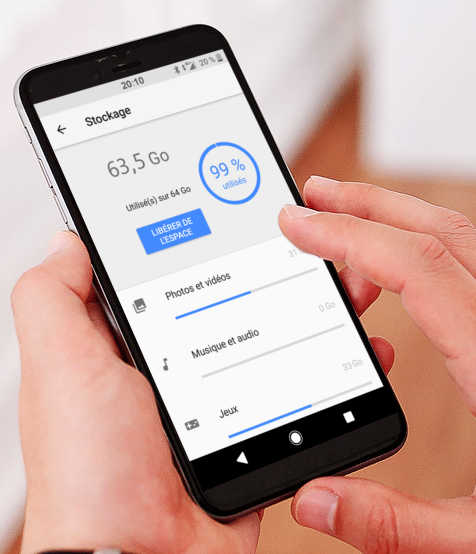)

Il souhaite remplir son smartphone de manière à avoir la meilleure liste de lecture possible à partir de sa bibliothèque, c'est à dire que la somme des notes des titres choisis doit être maximale. À quel problème problème connu cela vous fait-il penser&nbsp;?

<blockquote>
    
Il s'agit du problème du <a href="https://fr.wikipedia.org/wiki/Probl%C3%A8me_du_sac_%C3%A0_dos">sac à dos</a> (<em>knap sack problem</em> en anglais, souvent noté KSP). On considère un sac à dos ayant une capacité maximale, et des objets ayant chacun un encombrement et une valeur. Le but est de déterminer un sous-ensemble des objets disponibles qui puisse tenir dans le sac (c'est-à-dire dont la somme des encombrements ne dépasse pas la capacité du sac) et dont la valeur totale (la somme des valeurs des objets) soit maximale.
</blockquote>

## 3.1 Modélisation du problème
Comment pouvons nous modéliser ce problème sous la forme d'un programme linéaire&nbsp;?

<blockquote>

On note&nbsp;:
<ul>
    <li>$w_k\in\mathbb{Z}^{+}$ l'encombrement de l'objet $k$</li>
    <li>$v_k\in\mathbb{Z}^{+}$ la valeur de l'objet $k$</li>
    <li>$x_k\in\{0,1\}$ la variable de décision de l'objet $k$, c'est-à-dire une variable booléenne indiquant si l'objet $k$ est placé dans le sac</li>
    <li>$c$ la capacité du sac</li>
</ul>
    
Le problème peut alors être formulé&nbsp;:<br />
$
\begin{array}{rl}
\text{Maximiser} & \displaystyle\sum_{i=1}^{n}v_kx_k\\
\text{s.c.}      & \displaystyle\sum_{i=1}^{n}w_kx_k \leq c                             
\end{array}
$
</blockquote>


<br />

Un algorithme naïf pour déterminer un résultat optimal serait une approche par force brute, qui teste toutes les solutions (admissibles ou non) et conserve la meilleure solution admissible. Dans le cas de notre étudiant, c'est une solution qui semble envisageable. Mais si l'étudiant supprime plusieurs Giga octets de jeux, et qu'il enrichit sa bibliothèque musicale, cette solution restera-t-elle viable&nbsp;? Qu'est-ce qui va devenir bloquant&nbsp;?

<blockquote>

Cela revient à trouver toutes les combinaisons d'un ou plusieurs objets parmi les objets disponibles. Cette énumération considère toutes les solutions, y compris les non admissibles (celles qui ne tiennent pas dans le sac, c'est-à-dire qui ne respectent pas la contrainte $\displaystyle\sum_{i=1}^{n}w_kx_k \leq c$). Cette approche est valide, puisqu'on n'est pas capable de déterminer à l'avance les solutions qui seront admissibles.<br />
    <br />
    Le paramètre qui va déterminer le nombre de solutions, c'est donc le nombre d'objets disponibles, ici les chansons de la bibliothèque. Le nombre de solutions en fonction du nombre d'objets disponibles est la combinaison de $i$ objets parmi $n$ pour tout $i\leq n$, avec $n$ le nombre d'objets disponibles, soit&nbsp;:<br />
    $\displaystyle \sum_{i=1}^{n}{n\choose i} = 2^{n}$<br/>
    
   L'égalité avec $2^{n}$ (d'après l'une des propriétés du <a href="https://fr.wikipedia.org/wiki/Triangle_de_Pascal">triangle de Pascal</a>) s'obtient aussi en raisonnant sur le fait qu'une solution pour le problème à $n$ objets est un mot binaire de $n$ bits, chaque bit est associé à un objet, et indique si l'objet est présent dans le sac. Il y a $2^{n}$ valeurs possibles pour ce mot, donc autant de solutions.<br />
   
   Cette fonction est non polynomiale, mais là encore, cela ne suffit pas pour conclure que le problème est $\mathcal{NP}$-Complet, uniquement qu'on ne peut espérer pouvoir tester toutes les solutions pour un nombre important de chansons disponibles.
</blockquote>

## 3.2 Résolution

Puisque nous avons modélisé le problème sous forme linéaire, pourquoi ne pas tester l'algorithme du Simplexe dessus&nbsp;? Reprenons les données issues du Smartphone de notre étudiant. Attention aux bornes de nos variables&nbsp;!

In [12]:
# variables du problème
X1  = LpVariable("X_01", 0, 1)
X2  = LpVariable("X_02", 0, 1)
X3  = LpVariable("X_03", 0, 1)
X4  = LpVariable("X_04", 0, 1)
X5  = LpVariable("X_05", 0, 1)
X6  = LpVariable("X_06", 0, 1)
X7  = LpVariable("X_07", 0, 1)
X8  = LpVariable("X_08", 0, 1)
X9  = LpVariable("X_09", 0, 1)
X10 = LpVariable("X_10", 0, 1)


# probleme
prob = LpProblem("musique", LpMaximize)

# objectif
prob += 2*X1 + 5*X2 + X3 + 2*X4 + 3*X5 + 5*X6 + 2*X7 + 3*X8 + X9 + X10

# contrainte
prob += 40*X1 + 52*X2 + 27*X3 + 68*X4 + 80*X5 + 62*X6 + 63*X7 + 53*X8 + 56*X9 +59*X10 <=500

prob.solve()
print(LpStatus[prob.status])
print("Valeur totale = ", value(prob.objective))

poids_total = 0.0
poids = [40, 52, 27, 68, 80, 62, 63, 53, 56, 59]
for idx, v in enumerate(prob.variables()):
    print("X%d=%d" % (idx+1, v.varValue), end=', ')
    poids_total += v.varValue*poids[idx]
print("\npoids=%d" % poids_total)

Optimal
Valeur totale =  23.98214286
X1=1, X2=1, X3=1, X4=1, X5=1, X6=1, X7=1, X8=1, X9=0, X10=0, 
poids=500


Ça vous parait correct&nbsp;? Pourtant, cela ne l'est pas&nbsp;! Calculez à la main le poids de la solution, en reprenant les valeurs dans le tableau. Qu'obtenez-vous&nbsp;? Pourquoi&nbsp;?

<blockquote>

$40+52+27+68+80+62+63+53=445$

On affiche les variables de décision comme des entiers (arrondis à l'inférieur par défaut), alors qu'en fait ce sont des réels. Si on les affiche en tant que tel, on voit bien le problème. La variable $X_9$ est arrondie à l'inférieur lors de l'affichage
</blockquote>

Vérifions ça&nbsp;:

In [13]:
poids_total=0.0
for idx, v in enumerate(prob.variables()):
    print("X%d=%f" % (idx+1, v.varValue), end=', ') #SOLUTION
    poids_total += v.varValue*poids[idx]
print("\npoids=%d"%poids_total)

X1=1.000000, X2=1.000000, X3=1.000000, X4=1.000000, X5=1.000000, X6=1.000000, X7=1.000000, X8=1.000000, X9=0.982143, X10=0.000000, 
poids=500


Et là ça ne va plus du tout, La solution n'est pas admissible. On a vu qu'un arrondi inférieur produisait une solution qui, elle, est admissible. Mais avec une valeur de $X_9$ aussi proche de 1, ce n'est peut-être pas la solution optimale. Est-ce qu'un <a href="https://www.w3schools.com/python/ref_func_round.asp">arrondi au plus proche</a> marcherait mieux&nbsp;?

In [14]:
poids_total=0.0
for idx, v in enumerate(prob.variables()):
    print("X%d=%f" % (idx+1, v.varValue), end=', ')
    poids_total += int(round(v.varValue))*poids[idx]
print("\npoids=%d" % poids_total)

X1=1.000000, X2=1.000000, X3=1.000000, X4=1.000000, X5=1.000000, X6=1.000000, X7=1.000000, X8=1.000000, X9=0.982143, X10=0.000000, 
poids=501


Qu'observe-t-on&nbsp;?

<blockquote>

La solution générée par arrondi supérieur génère une solution non admissible, elle dépasse la contrainte de contenance du sac.
</blockquote>

Parmi toutes les solutions générées, nous en avons une solution qui est admissible. Est-ce une bonne méthode pour trouver une solution optimale&nbsp;? Prenons cet exemple, dans lequel l'espace des solutions admissibles délimité par les deux contraintes est en blanc. Est-ce que, pour un problème _de maximisation_, arrondir une solution optimale réelle fonctionnerait&nbsp;?

![svg image](data:image/svg+xml,%3Csvg%20width%3D%22500px%22%20version%3D%221.1%22%20viewBox%3D%220%200%20221.34%20163.14%22%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg%22%3E%0A%3Cdefs%3E%0A%3CclipPath%20id%3D%22a%22%3E%0A%3Cpath%20d%3D%22m0.93606%209.3606h848.07v618.74h-848.07z%22%2F%3E%0A%3C%2FclipPath%3E%0A%3C%2Fdefs%3E%0A%3Cg%20transform%3D%22translate%2813.455%20-51.027%29%22%3E%0A%3Cpath%20d%3D%22m-8.9052%2072.273v120.61h212v-120.61z%22%20fill%3D%22%23c9c9c9%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m-8.9052%2072.273h212v120.61h-212z%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m65.357%20192.76%2028.695-88.95%2039.937%2088.95z%22%20fill%3D%22%23fff%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Ctext%20x%3D%22-9.8662786%22%20y%3D%22197.41919%22%20fill%3D%22%23000000%22%20font-family%3D%22Arial%22%20font-size%3D%223.4727px%22%20font-weight%3D%22400%22%20letter-spacing%3D%220px%22%20stroke-width%3D%22.26458%22%20word-spacing%3D%220px%22%20style%3D%22line-height%3A125%25%22%20xml%3Aspace%3D%22preserve%22%3E%3Ctspan%20x%3D%22-9.8662786%22%20y%3D%22197.41919%22%20stroke-width%3D%22.26458%22%3E%3Ctspan%20dx%3D%220%22%20dy%3D%220%22%20fill%3D%22%23000000%22%20font-family%3D%22Arial%22%20font-size%3D%223.4727px%22%20font-weight%3D%22400%22%20stroke-width%3D%22.26458%22%3E0%3C%2Ftspan%3E%3C%2Ftspan%3E%3C%2Ftext%3E%0A%3Ctext%20x%3D%22-13.59896%22%20y%3D%22193.83653%22%20fill%3D%22%23000000%22%20font-family%3D%22Arial%22%20font-size%3D%223.4727px%22%20font-weight%3D%22400%22%20letter-spacing%3D%220px%22%20stroke-width%3D%22.26458%22%20word-spacing%3D%220px%22%20style%3D%22line-height%3A125%25%22%20xml%3Aspace%3D%22preserve%22%3E%3Ctspan%20x%3D%22-13.59896%22%20y%3D%22193.83653%22%20stroke-width%3D%22.26458%22%3E%3Ctspan%20dx%3D%220%22%20dy%3D%220%22%20fill%3D%22%23000000%22%20font-family%3D%22Arial%22%20font-size%3D%223.4727px%22%20font-weight%3D%22400%22%20stroke-width%3D%22.26458%22%3E0%3C%2Ftspan%3E%3C%2Ftspan%3E%3C%2Ftext%3E%0A%3Cpath%20d%3D%22m81.988%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m81.988%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m7.6884%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m7.6884%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%20192.89c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%20192.89c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m26.263%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m26.263%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m119.14%20192.89c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m119.14%20192.89c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m44.838%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m44.838%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m137.71%20192.89c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m137.71%20192.89c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m63.413%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m63.413%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m156.29%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m156.29%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m174.86%20192.89c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m174.86%20192.89c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m193.44%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m193.44%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m-10.887%20192.64c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m-10.887%20192.64c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m81.988%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m81.988%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m7.6884%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m7.6884%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%20176.05c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%20176.05c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m26.263%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m26.263%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m119.14%20176.05c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m119.14%20176.05c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m44.838%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m44.838%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m137.71%20176.05c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m137.71%20176.05c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m63.413%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m63.413%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m156.29%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m156.29%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m174.86%20176.05c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m174.86%20176.05c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m193.44%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m193.44%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m-10.887%20175.8c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m-10.887%20175.8c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m81.988%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m81.988%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m7.6884%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m7.6884%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%20161.43c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%20161.43c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m26.263%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m26.263%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m118.89%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m118.89%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m44.838%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m44.838%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m137.47%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.9597%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m137.47%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.9597%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m63.413%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m63.413%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m156.04%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m156.04%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m174.62%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.9597%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m174.62%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.9597%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m193.19%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m193.19%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m-10.887%20161.19c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m-10.887%20161.19c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m81.988%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m81.988%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m7.6884%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m7.6884%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%20144.59c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%20144.59c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m26.263%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m26.263%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m118.89%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m118.89%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m44.838%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m44.838%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m137.47%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.9597%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m137.47%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.9597%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m63.413%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m63.413%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m156.04%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m156.04%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m174.62%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.9597%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m174.62%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.9597%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m193.19%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m193.19%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m-10.887%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m-10.887%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m82.236%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m82.236%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m7.9361%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m7.9361%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m100.81%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m100.81%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m26.511%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m26.511%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m119.39%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m119.39%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m45.086%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m45.086%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m137.96%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m137.96%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m63.661%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m63.661%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m156.54%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m156.54%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m175.11%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m175.11%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m193.69%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m193.69%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m-10.639%20127.75c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m-10.639%20127.75c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m82.236%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m82.236%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m7.9361%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m7.9361%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m100.81%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m100.81%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m26.511%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m26.511%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m119.39%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m119.39%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m45.086%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m45.086%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m137.96%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m137.96%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m63.661%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m63.661%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m156.54%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m156.54%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m175.11%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m175.11%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m193.69%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m193.69%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m-10.639%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m-10.639%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m82.236%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m82.236%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m7.9361%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m7.9361%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%2096.545c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%2096.545c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m26.511%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m26.511%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m119.14%2096.545c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m119.14%2096.545c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m45.086%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m45.086%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m137.71%2096.545c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m137.71%2096.545c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m63.661%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m63.661%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m156.29%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m156.29%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m174.86%2096.545c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m174.86%2096.545c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m193.44%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m193.44%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m-10.639%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m-10.639%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m82.236%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m82.236%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m7.9361%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m7.9361%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%2079.951c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%2079.951c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m26.511%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m26.511%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m119.14%2079.951c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m119.14%2079.951c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m45.086%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m45.086%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m137.71%2079.951c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m137.71%2079.951c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m63.661%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m63.661%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m156.29%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m156.29%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m174.86%2079.951c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m174.86%2079.951c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m193.44%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m193.44%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m-10.639%2079.703c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m-10.639%2079.703c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20transform%3D%22matrix%28.28067%200%200%20.26458%20-20.921%2048.497%29%22%20d%3D%22m468.56%209.8287-183.53%20616.05%22%20clip-path%3D%22url%28%23a%29%22%20fill%3D%22none%22%20stroke%3D%22%23f00%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%221.8721px%22%2F%3E%0A%3Cpath%20transform%3D%22matrix%28.28315%200%200%20.26457%20-26.54%2049.532%29%22%20d%3D%22m348.68%2017.317%20245.72%20591.12%22%20clip-path%3D%22url%28%23a%29%22%20fill%3D%22none%22%20stroke%3D%22%23f00%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%221.8721px%22%2F%3E%0A%3C%2Fg%3E%0A%3C%2Fsvg%3E)

<blockquote>

Non. Arrondir les variables de décision comme on a tenté de le faire ici ne permet pas de garantir l'optimalité, même si cela peut arriver. On n'est même pas sûr d'obtenir une solution admissible. Il suffit de considérer la fonction économique (en bleu) suivante&nbsp;:

![svg image](data:image/svg+xml,%3Csvg%20width%3D%22500px%22%20version%3D%221.1%22%20viewBox%3D%220%200%20221.34%20163.14%22%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg%22%3E%0A%3Cdefs%3E%0A%3CclipPath%20id%3D%22a%22%3E%0A%3Cpath%20d%3D%22m0.93606%209.3606h848.07v618.74h-848.07z%22%2F%3E%0A%3C%2FclipPath%3E%0A%3CclipPath%20id%3D%22b%22%3E%0A%3Cpath%20d%3D%22m14.977%2014.977h834.03v297.67h-834.03z%22%2F%3E%0A%3C%2FclipPath%3E%0A%3C%2Fdefs%3E%0A%3Cg%20transform%3D%22translate%2813.455%20-51.027%29%22%3E%0A%3Cpath%20d%3D%22m-8.9052%2072.273v120.61h212v-120.61z%22%20fill%3D%22%23c9c9c9%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m-8.9052%2072.273h212v120.61h-212z%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m65.357%20192.76%2028.695-88.95%2039.937%2088.95z%22%20fill%3D%22%23fff%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Ctext%20x%3D%22-9.8662786%22%20y%3D%22197.41919%22%20fill%3D%22%23000000%22%20font-family%3D%22Arial%22%20font-size%3D%223.4727px%22%20font-weight%3D%22400%22%20letter-spacing%3D%220px%22%20stroke-width%3D%22.26458%22%20word-spacing%3D%220px%22%20style%3D%22line-height%3A125%25%22%20xml%3Aspace%3D%22preserve%22%3E%3Ctspan%20x%3D%22-9.8662786%22%20y%3D%22197.41919%22%20stroke-width%3D%22.26458%22%3E%3Ctspan%20dx%3D%220%22%20dy%3D%220%22%20fill%3D%22%23000000%22%20font-family%3D%22Arial%22%20font-size%3D%223.4727px%22%20font-weight%3D%22400%22%20stroke-width%3D%22.26458%22%3E0%3C%2Ftspan%3E%3C%2Ftspan%3E%3C%2Ftext%3E%0A%3Ctext%20x%3D%22-13.59896%22%20y%3D%22193.83653%22%20fill%3D%22%23000000%22%20font-family%3D%22Arial%22%20font-size%3D%223.4727px%22%20font-weight%3D%22400%22%20letter-spacing%3D%220px%22%20stroke-width%3D%22.26458%22%20word-spacing%3D%220px%22%20style%3D%22line-height%3A125%25%22%20xml%3Aspace%3D%22preserve%22%3E%3Ctspan%20x%3D%22-13.59896%22%20y%3D%22193.83653%22%20stroke-width%3D%22.26458%22%3E%3Ctspan%20dx%3D%220%22%20dy%3D%220%22%20fill%3D%22%23000000%22%20font-family%3D%22Arial%22%20font-size%3D%223.4727px%22%20font-weight%3D%22400%22%20stroke-width%3D%22.26458%22%3E0%3C%2Ftspan%3E%3C%2Ftspan%3E%3C%2Ftext%3E%0A%3Cpath%20d%3D%22m81.988%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m81.988%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m7.6884%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m7.6884%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%20192.89c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%20192.89c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m26.263%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m26.263%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m119.14%20192.89c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m119.14%20192.89c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m44.838%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m44.838%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m137.71%20192.89c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m137.71%20192.89c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m63.413%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m63.413%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m156.29%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m156.29%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m174.86%20192.89c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m174.86%20192.89c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m193.44%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m193.44%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m-10.887%20192.64c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m-10.887%20192.64c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m81.988%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m81.988%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m7.6884%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m7.6884%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%20176.05c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%20176.05c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m26.263%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m26.263%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m119.14%20176.05c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m119.14%20176.05c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m44.838%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m44.838%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m137.71%20176.05c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m137.71%20176.05c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m63.413%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m63.413%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m156.29%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m156.29%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m174.86%20176.05c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m174.86%20176.05c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m193.44%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m193.44%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m-10.887%20175.8c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m-10.887%20175.8c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m81.988%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m81.988%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m7.6884%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m7.6884%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%20161.43c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%20161.43c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m26.263%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m26.263%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m118.89%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m118.89%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m44.838%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m44.838%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m137.47%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.9597%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m137.47%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.9597%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m63.413%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m63.413%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m156.04%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m156.04%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m174.62%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.9597%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m174.62%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.9597%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m193.19%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m193.19%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m-10.887%20161.19c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m-10.887%20161.19c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m81.988%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m81.988%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m7.6884%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m7.6884%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%20144.59c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%20144.59c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m26.263%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m26.263%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m118.89%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m118.89%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m44.838%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m44.838%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m137.47%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.9597%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m137.47%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.9597%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m63.413%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m63.413%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m156.04%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m156.04%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m174.62%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.9597%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m174.62%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.9597%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m193.19%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m193.19%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m-10.887%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m-10.887%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m82.236%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m82.236%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m7.9361%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m7.9361%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m100.81%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m100.81%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m26.511%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m26.511%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m119.39%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m119.39%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m45.086%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m45.086%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m137.96%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m137.96%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m63.661%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m63.661%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m156.54%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m156.54%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m175.11%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m175.11%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m193.69%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m193.69%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m-10.639%20127.75c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m-10.639%20127.75c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m82.236%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m82.236%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m7.9361%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m7.9361%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m100.81%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m100.81%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m26.511%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m26.511%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m119.39%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m119.39%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m45.086%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m45.086%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m137.96%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m137.96%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m63.661%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m63.661%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m156.54%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m156.54%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m175.11%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m175.11%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m193.69%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m193.69%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m-10.639%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m-10.639%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m82.236%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m82.236%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m7.9361%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m7.9361%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%2096.545c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%2096.545c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m26.511%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m26.511%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m119.14%2096.545c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m119.14%2096.545c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m45.086%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m45.086%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m137.71%2096.545c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m137.71%2096.545c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m63.661%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m63.661%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m156.29%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m156.29%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m174.86%2096.545c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m174.86%2096.545c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m193.44%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m193.44%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m-10.639%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m-10.639%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m82.236%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m82.236%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m7.9361%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m7.9361%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%2079.951c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%2079.951c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m26.511%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m26.511%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m119.14%2079.951c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m119.14%2079.951c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m45.086%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m45.086%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m137.71%2079.951c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m137.71%2079.951c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m63.661%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m63.661%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m156.29%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m156.29%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m174.86%2079.951c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m174.86%2079.951c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m193.44%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m193.44%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m-10.639%2079.703c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m-10.639%2079.703c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20transform%3D%22matrix%28.28067%200%200%20.26458%20-20.921%2048.497%29%22%20d%3D%22m468.56%209.8287-183.53%20616.05%22%20clip-path%3D%22url%28%23a%29%22%20fill%3D%22none%22%20stroke%3D%22%23f00%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%221.8721px%22%2F%3E%0A%3Cpath%20transform%3D%22matrix%28.28315%200%200%20.26457%20-26.54%2049.532%29%22%20d%3D%22m348.68%2017.317%20245.72%20591.12%22%20clip-path%3D%22url%28%23a%29%22%20fill%3D%22none%22%20stroke%3D%22%23f00%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%221.8721px%22%2F%3E%0A%3Cpath%20transform%3D%22matrix%28.26458%200%200%20.26458%20-18.217%2061.123%29%22%20d%3D%22m15.913%2015.913%20831.05%20294.68%22%20clip-path%3D%22url%28%23b%29%22%20fill%3D%22none%22%20stroke%3D%22%235b9bd5%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%222.8082px%22%2F%3E%0A%3C%2Fg%3E%0A%3C%2Fsvg%3E%0A)

Dans cet exemple, la variable en ordonnée peut être arrondie à l'inférieur, mais dans ce cas, la variable en abscisse ne peut être arrondie ni au supérieur, ni à l'inférieur, les deux solutions obtenues sont non admissibles.

C'est d'ailleurs un résultat connu. Un programme linéaire en nombre entier ou mixte entiers/réels <a href="https://en.wikipedia.org/wiki/Integer_programming#Proof_of_NP-hardness">ne peut être résolu en temps polynomial</a>, à moins que $\mathcal{N}$=$\mathcal{NP}$ . La présence dans le programme linéaire des variables $X_k\in\{0,1\}$ rend donc ce problème $\mathcal{NP}$-Difficile.

Si l'on souhaite traiter ce problème du sac-à-dos par programmation linéaire, il faudra donc s'appuyer sur une approche beaucoup plus complexe, utilisant de la relaxation, des méthodes arborescentes etc.

D'ailleurs, PuLP permet cette approche, il suffit de changer le type des variables du programme (c'est `LpContinuous` par défaut, mais on peut imposer des variables de type `LpInteger` ou `LpBinary`). PuLP utilisera alors si c'est possible les implémentations disponibles dans la bibliothèque avec laquelle il est interfacé (voire des heuristiques si elles sont disponibles, et si le problème est trop complexe pour une méthode exacte).  il faut comprendre que ces méthodes vont forcément avoir une complexité temporelle très importante (exponentielle dans le pire cas). Elles ne pourront présenter des performances moyennes un tant soit peu compétitives que sur des instances relativement petites, et au prix d'un travail important d'adaptation au problème considéré.
</blockquote>

C'est finalement assez logique, puisque le problème de décision est $\mathcal{NP}$-Complet ([on le sait depuis 1972](https://fr.wikipedia.org/wiki/21_probl%C3%A8mes_NP-complets_de_Karp)). Le nombre exponentiel de solution, qu'on a démontré tout à l'heure, était-il un indice&nbsp;?

<blockquote>

Non. Ce n'est pas parce qu'un problème d'optimisation a un nombre exponentiel de solutions qu'il est $\mathcal{NP}$-Complet (plus précisément, que son <em>problème de décision associé</em> est $\mathcal{NP}$-Complet). De même, un problème que l'on a modélisé par un PLNE n'est pas nécessairement difficile. Il peut très bien exister un algorithme polynomial qui résout ce problème. 

Par contre, si un problème est prouvé $\mathcal{NP}$-Complet, cela implique nécessairement qu'il admet un nombre exponentiel de solutions, et que sa modélisation par programmation linéaire nécessite forcément des variables en nombre entier.
</blockquote>

# 4 Conclusion

Ce Workshop est maintenant fini, vous avez utilisé la programmation linéaire, vous en avez découvert les principes mathématiques de base, le fonctionnement général, et vous en avez testé les limites.

<blockquote class="comment">
<strong style="text-decoration:underline;display:block">Explications</strong>

On n'a pourtant qu'effleuré le sujet, la programmation linéaire va bien plus loin, justement pour contourner ces limites. On pourrait d'ailleurs essayer de continuer à suivre cette piste pour le problème du sac à dos. Les méthodes d'<a href="https://fr.wikipedia.org/wiki/Optimisation_lin%C3%A9aire_en_nombres_entiers">optimisation de programme linéaire en nombre entier</a> utilisent notamment les <a href="https://fr.wikipedia.org/wiki/S%C3%A9paration_et_%C3%A9valuation">méthodes arborescentes</a> pour traiter ce genre de problème. Mais il s'agit d'approches assez compliquées, et pour lesquelles les élèves n'ont pas le temps.

Et il y a la programmation mathématique en général, sujet encore plus vaste. Tous les problèmes ne sont pas linéaires… Le <a href="https://en.wikipedia.org/wiki/Quadratic_assignment_problem">problème d'affectation quadratique</a>, par exemple, est extrêmement connu et étudié. Il est particulièrement difficile, du fait de la présence d'inégalités quadratiques dans la fonction économique. Dans ce cas, une des approches qui donne de bons résultats est la <a href="https://fr.wikipedia.org/wiki/Programmation_par_contraintes">programmation par contraintes</a>, qui peut considérer des contraintes non linéaires. Là encore, c'est hors du périmètre de ce bloc.

</blockquote>

Et si vous êtes déçus de ne pas être venus à bout du problème du sac à dos, rassurez-vous, on ne s'avoue pas vaincus, dès la semaine prochaine, on s'y attaque à nouveau. Et cette fois-ci, avec beaucoup plus de succès&nbsp;!